In [8]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Create an empty list to hold the weather data
city_data = []
# PRint the begingin of the logging
print("Begining Data Retrieval      ")
print("-----------------------------")

#Create counter
record_count = 1
set_count = 1

Begining Data Retrieval      
-----------------------------


In [10]:
#create random lats & lngs combinations
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [11]:
# add the lats nad lngs to a list
coordinates = list(lats_lngs)

In [12]:
# Create a list for holding cities
cities = []
#identify the nearest city for each lats/lngs combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique add to the list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

615

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | lagoa
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | pevek
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | raudeberg
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | beloha
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | zemio
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | aldama
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | juntas
Processing Record 20 of Set 1 | bodo
Processing Record 21 of Set 1 | touros
Processing Record 22 of Set 1 | ozgon
City not found. Skipping...
Processing Record 23 of Set 1 | qaanaaq
Processing Record 24 of 

Processing Record 38 of Set 4 | lebu
Processing Record 39 of Set 4 | amapa
Processing Record 40 of Set 4 | klaksvik
Processing Record 41 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 42 of Set 4 | grand gaube
Processing Record 43 of Set 4 | luanda
Processing Record 44 of Set 4 | upernavik
Processing Record 45 of Set 4 | west wendover
Processing Record 46 of Set 4 | ossora
Processing Record 47 of Set 4 | olinda
Processing Record 48 of Set 4 | banmo
City not found. Skipping...
Processing Record 49 of Set 4 | the valley
Processing Record 50 of Set 4 | ushtobe
Processing Record 1 of Set 5 | opuwo
Processing Record 2 of Set 5 | beamsville
Processing Record 3 of Set 5 | katsiveli
City not found. Skipping...
Processing Record 4 of Set 5 | sitka
Processing Record 5 of Set 5 | karla
Processing Record 6 of Set 5 | bredasdorp
Processing Record 7 of Set 5 | auki
Processing Record 8 of Set 5 | hamilton
Processing Record 9 of Set 5 | skibbereen
Processing Record 10 of Set 5 | 

Processing Record 27 of Set 8 | quelimane
Processing Record 28 of Set 8 | hammerfest
Processing Record 29 of Set 8 | wahran
City not found. Skipping...
Processing Record 30 of Set 8 | victor harbor
Processing Record 31 of Set 8 | marsaxlokk
Processing Record 32 of Set 8 | porto recanati
Processing Record 33 of Set 8 | oranjestad
Processing Record 34 of Set 8 | belmonte
Processing Record 35 of Set 8 | petropavlovskoye
Processing Record 36 of Set 8 | forrest city
Processing Record 37 of Set 8 | lorengau
Processing Record 38 of Set 8 | dokka
Processing Record 39 of Set 8 | el molino
Processing Record 40 of Set 8 | lavrentiya
Processing Record 41 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 42 of Set 8 | akyab
Processing Record 43 of Set 8 | aquiraz
Processing Record 44 of Set 8 | calama
Processing Record 45 of Set 8 | mutsamudu
City not found. Skipping...
Processing Record 46 of Set 8 | boddam
Processing Record 47 of Set 8 | south venice
Processing Record 4

Processing Record 11 of Set 12 | muriwai beach
Processing Record 12 of Set 12 | challapata
Processing Record 13 of Set 12 | khani
Processing Record 14 of Set 12 | eyl
Processing Record 15 of Set 12 | bargal
City not found. Skipping...
Processing Record 16 of Set 12 | brae
Processing Record 17 of Set 12 | japura
Processing Record 18 of Set 12 | portland
Processing Record 19 of Set 12 | wanparti
Processing Record 20 of Set 12 | buala
Processing Record 21 of Set 12 | sena madureira
Processing Record 22 of Set 12 | picayune
Processing Record 23 of Set 12 | winnetka
Processing Record 24 of Set 12 | tiarei
Processing Record 25 of Set 12 | miandrivazo
Processing Record 26 of Set 12 | gazanjyk
Processing Record 27 of Set 12 | muzaffarabad
Processing Record 28 of Set 12 | aksarka
Processing Record 29 of Set 12 | iqaluit
Processing Record 30 of Set 12 | nyurba
Processing Record 31 of Set 12 | neubrandenburg
Processing Record 32 of Set 12 | maslovskiy
City not found. Skipping...
Processing Record

In [14]:
len(city_data)

563

In [15]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lagoa,39.0500,-27.9833,69.82,90,0,9.04,PT,2021-07-30 01:10:10
1,Busselton,-33.6500,115.3333,50.09,70,85,26.44,AU,2021-07-30 01:10:11
2,Hermanus,-34.4187,19.2345,51.91,81,18,7.85,ZA,2021-07-30 01:10:11
3,Pevek,69.7008,170.3133,32.04,98,100,25.64,RU,2021-07-30 01:10:12
4,New Norfolk,-42.7826,147.0587,53.92,70,100,1.99,AU,2021-07-30 01:10:12
5,Raudeberg,61.9875,5.1352,60.19,93,100,15.30,NO,2021-07-30 01:10:12
6,Hobart,-42.8794,147.3294,54.27,65,75,1.99,AU,2021-07-30 01:10:13
7,Yellowknife,62.4560,-114.3525,71.29,46,88,11.01,CA,2021-07-30 01:05:38
8,Beloha,-25.1667,45.0500,64.69,76,13,5.08,MG,2021-07-30 01:10:13
9,East London,-33.0153,27.9116,57.60,67,0,6.40,ZA,2021-07-30 01:10:14


In [16]:
#reorder columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lagoa,PT,2021-07-30 01:10:10,39.0500,-27.9833,69.82,90,0,9.04
1,Busselton,AU,2021-07-30 01:10:11,-33.6500,115.3333,50.09,70,85,26.44
2,Hermanus,ZA,2021-07-30 01:10:11,-34.4187,19.2345,51.91,81,18,7.85
3,Pevek,RU,2021-07-30 01:10:12,69.7008,170.3133,32.04,98,100,25.64
4,New Norfolk,AU,2021-07-30 01:10:12,-42.7826,147.0587,53.92,70,100,1.99
...,...,...,...,...,...,...,...,...,...
558,Cosala,MX,2021-07-30 01:13:59,24.4125,-106.6908,81.10,93,83,3.58
559,Urcos,PE,2021-07-30 01:14:00,-13.6861,-71.6228,51.69,83,10,5.59
560,Gogrial,SS,2021-07-30 01:14:00,8.5332,28.1004,72.28,94,100,8.63
561,Mana,GF,2021-07-30 01:14:01,5.6592,-53.7767,77.58,85,2,4.23


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

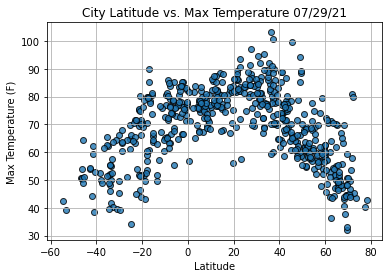

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

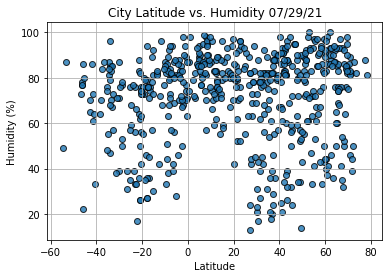

In [20]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

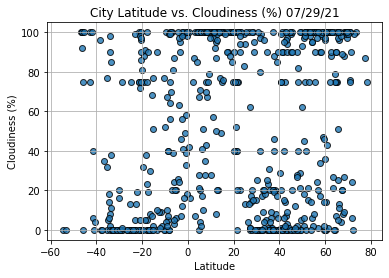

In [21]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

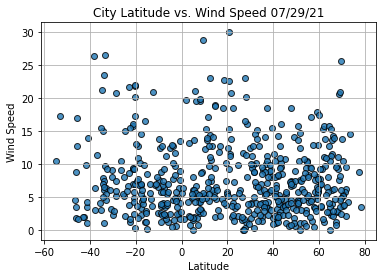

In [22]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()